In [1]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
import pylab as py
import matplotlib.cm as cm
import sys
import os
import errno
import netCDF4 as nc
import hickle as hkl

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

a=6371.0e3
R=a

ncfile='/project2/tas1/pragallva/Fall_quarter_2019/exp_data/echam/data_in_isentropic_coord/\
ATM_dm_pl_echr0001_10/ATM_dm_pl_echr0001_1059.nc'
v_var=nc.Dataset(ncfile,'r')

ncfilep='/project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0001/ATM_dm_pl_echr0001_1059.nc'
v_varp=nc.Dataset(ncfilep,'r')


ncfileb='/project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0003/ATM_dm_ml_echr0003_1059.nc'
v_varb=nc.Dataset(ncfileb,'r')


In [2]:
# ls /project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0003/

In [3]:
# lon,lat,lev,time, u, v, q, omega, geopoth

In [4]:
# theta_ncf    = T_ncf*(100000/P_ncf[None,:,None,None])**0.286

In [5]:
ps=v_varb.variables['aps'][:]

In [6]:
Cp=1000; L=2260*1000; g=10

In [10]:
T=v_var['t'][:]
Tp=v_varp['t'][:2]

In [12]:
q=v_var['q'][:]
qp=v_varp['q'][:2]

In [13]:
H=v_var['geopoth'][:]
Hp=v_varp['geopoth'][:2]

In [14]:
u=v_var['u'][:]
up=v_varp['u'][:2]

In [15]:
v=v_var['v'][:]
vp=v_varp['v'][:2]

In [16]:
theta = v_var['level'][:]
pres  = v_var['pres'][:]
lat   = v_var['lat'][:]

In [48]:
pres.shape

(2, 20, 96, 192)

In [32]:
P    = v_varp['lev'][:]
lat  = v_varp['lat'][:]
lon  = v_varp['lon'][:]

In [18]:
PS = ps[:2,None,:,:]
PP = P[None,:,None,None]

In [53]:
thetap = Tp*(10**5/PP)**0.286

In [52]:
mask = (PP<PS)
mask = mask.astype(float)
mask[mask<1]= np.nan # 
Tp_correct = Tp*mask

In [28]:
theta_dot=v_var['deltheta_delt'][:]

In [30]:
theta_dot.shape

(2, 20, 96, 192)

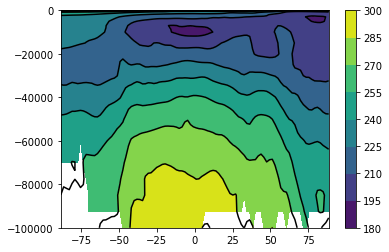

In [20]:
py.contourf(lat, -P, Tp_correct[0,:,:,0]); py.colorbar()
py.contour(lat, -P,  Tp[0,:,:,0], colors='k'); 

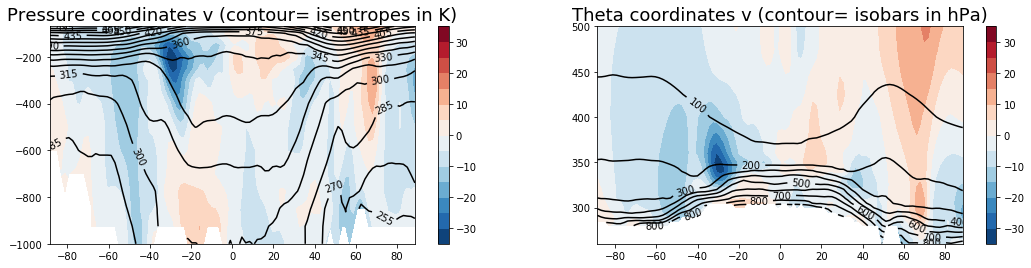

In [61]:
py.figure(figsize=(18,4))
py.subplot(1,2,1)
pi=12
ra=np.arange(-35,40,5)
py.contourf( lat,  -P[:-pi]/100, (vp*mask)[1,:-pi:,:,80],    ra,cmap=cm.RdBu_r); py.colorbar()
c=py.contour(lat,  -P[:-pi]/100, (thetap*mask)[1,:-pi,:,80], 20,colors='k'); #py.colorbar()
py.clabel(c, fmt='%1d')
py.title('Pressure coordinates v (contour= isentropes in K)', fontsize=18)

py.subplot(1,2,2)
py.contourf(lat, theta,v[1,:,:,80],ra,cmap=cm.RdBu_r); py.colorbar()
c=py.contour(lat, theta,pres[1,:,:,80],10,colors='k'); 
py.clabel(c, fmt='%1d')
# py.ylim(280,375)
py.title('Theta coordinates v (contour= isobars in hPa)', fontsize=18)

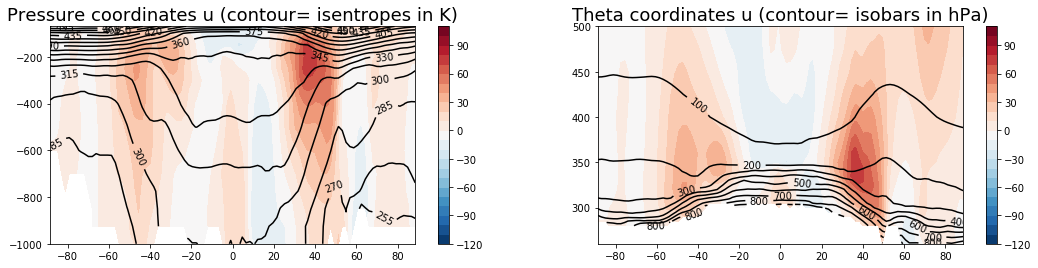

In [64]:
py.figure(figsize=(18,4))
py.subplot(1,2,1)
pi=12
ra=np.arange(-120,120,10)
py.contourf( lat,  -P[:-pi]/100, (up*mask)[1,:-pi:,:,80],    ra,cmap=cm.RdBu_r); py.colorbar()
c=py.contour(lat,  -P[:-pi]/100, (thetap*mask)[1,:-pi,:,80], 20,colors='k'); #py.colorbar()
py.clabel(c, fmt='%1d')
py.title('Pressure coordinates u (contour= isentropes in K)', fontsize=18)

py.subplot(1,2,2)
py.contourf(lat, theta,u[1,:,:,80],ra,cmap=cm.RdBu_r); py.colorbar()
c=py.contour(lat, theta,pres[1,:,:,80],10,colors='k'); 
py.clabel(c, fmt='%1d')
# py.ylim(280,375)
py.title('Theta coordinates u (contour= isobars in hPa)', fontsize=18)

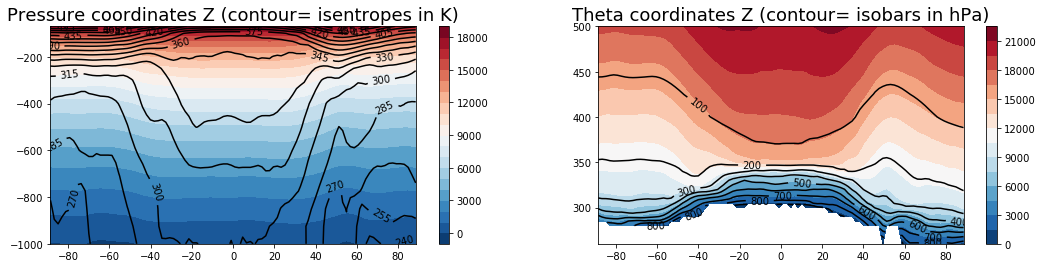

In [63]:
py.figure(figsize=(18,4))
py.subplot(1,2,1)
pi=12
ra=20#np.arange(-120,120,10)
py.contourf( lat,  -P[:-pi]/100, Hp[1,:-pi:,:,80],    ra,cmap=cm.RdBu_r); py.colorbar()
c=py.contour(lat,  -P[:-pi]/100, thetap[1,:-pi,:,80], 20,colors='k'); #py.colorbar()
py.clabel(c, fmt='%1d')
py.title('Pressure coordinates Z (contour= isentropes in K)', fontsize=18)

py.subplot(1,2,2)
py.contourf(lat, theta, H[1,:,:,80],ra,cmap=cm.RdBu_r); py.colorbar()
c=py.contour(lat, theta,pres[1,:,:,80],10,colors='k'); 
py.clabel(c, fmt='%1d')
# py.ylim(280,375)
py.title('Theta coordinates Z (contour= isobars in hPa)', fontsize=18)

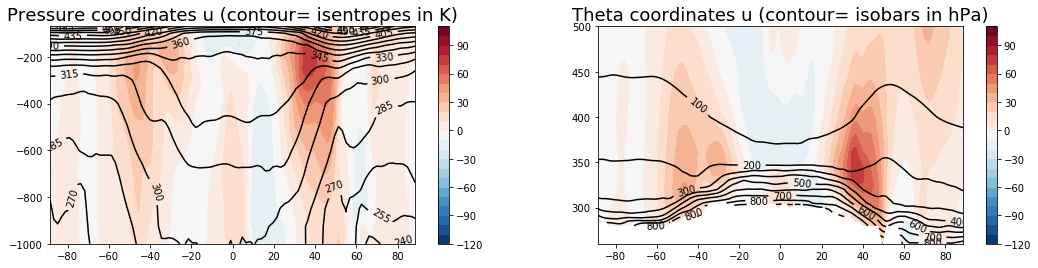

In [66]:
py.figure(figsize=(18,4))
py.subplot(1,2,1)
pi=12
ra=np.arange(-120,120,10)
py.contourf( lat,  -P[:-pi]/100, up[1,:-pi:,:,80],    ra,cmap=cm.RdBu_r); py.colorbar()
c=py.contour(lat,  -P[:-pi]/100, thetap[1,:-pi,:,80], 20,colors='k'); #py.colorbar()
py.clabel(c, fmt='%1d')
py.title('Pressure coordinates u (contour= isentropes in K)', fontsize=18)

py.subplot(1,2,2)
py.contourf(lat, theta,u[1,:,:,80],ra,cmap=cm.RdBu_r); py.colorbar()
c=py.contour(lat, theta,pres[1,:,:,80],10,colors='k'); 
py.clabel(c, fmt='%1d')
# py.ylim(280,375)
py.title('Theta coordinates u (contour= isobars in hPa)', fontsize=18)

#### Load files

In [48]:
import glob
import numpy as np
import scipy.io as sio
import pylab as py
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import stats

#### Invoke all the files

source = \
'/project2/tas1/pragallva/Summer_quarter_2019/\
post_process_data/isca_repeat/avged_over30days/'

exps    = ['0.1x_stress/', '0.5x_stress/', \
           'HC0_la5m_oc5m/', \
           '2x_stress/', '10x_stress/',]

py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

In [3]:
PW_flux    = "flux_interp_dict.hkl"
PW_flux_v  = "flux_vert_interp_dict.hkl"
Wm2_flux   = "div_flux_dict.hkl"
Wm2_flux_v = "div_vert_interp_dict.hkl"
coord1     = "coord_dic.hkl"
v_MMC      = "v_MMC.hkl"
v_decomp   = "v_decomp.hkl"
raw_data   = "raw_data_dict.hkl"

In [4]:
Cp=1000; L=2260*1000; g=10

In [5]:
ls /project2/tas1/pragallva/Summer_quarter_2019/post_process_data/isca_repeat/avged_over30days/0.1x_stress/

coord_dic.hkl             eddies_monthly_pass_freq_avg30.hkl  v_decomp.hkl
coord.hkl                 flux_interp_dict.hkl                v_MMC.hkl
div_flux_dict.hkl         flux_vert_interp_dict.hkl
div_vert_interp_dict.hkl  raw_data_dict.hkl


In [6]:
def extract(field, suffix, verbose=True):
    dic=[]
    for i in range(len(exps)):
        experiment=source+exps[i]+field
        dic.append(load(experiment))
    for key, value in dic[0].items():
        if type(value)==type({}):
            for sub_key, sub_value in value.items():
                globals()[sub_key+suffix]=[]
                if verbose == True :
                    print sub_key+suffix
        else :    
                globals()[key+suffix]=[]
                if verbose == True :
                    print key+suffix,',',
    for d in range(len(dic)):
        for key, value in dic[d].items():
            if type(value)==type({}):
                for sub_key, sub_value in value.items():
                    globals()[sub_key+suffix].append(sub_value)
            else :    
                    globals()[key+suffix].append(value) 
    for key, value in dic[0].items():
      if type(value)==type({}):
             for sub_key, sub_value in value.items():
                globals()[sub_key+suffix]=np.array(globals()[sub_key+suffix])
      else :    
                globals()[key+suffix]=np.array(globals()[key+suffix])

    print '\n-----------------------------------------'
    

In [7]:
PW_flux    = "flux_interp_dict.hkl"
PW_flux_v  = "flux_vert_interp_dict.hkl"
Wm2_flux   = "div_flux_dict.hkl"
Wm2_flux_v = "div_vert_interp_dict.hkl"
coord1     = "coord_dic.hkl"
v_MMC      = "v_MMC.hkl"
v_decomp   = "v_decomp.hkl"
raw_data   = "raw_data_dict.hkl"

#### Combine all experiments
#### Load all MSE transport in PW
#### Load all raw data

In [18]:
extract(PW_flux,'_pw'); 
SW_sfc_pw=-SW_sfc_d_pw; LW_sfc_pw=-LW_sfc_d_pw
NE_pw1    = SWABS_pw+SHF_pw-olr_pw-dhdt_pw 
NE_pw2    = TE_pw+SE_pw+MM_pw
 
extract(Wm2_flux,'_wm2')
NE_wm21    = SWABS_wm2+SHF_wm2-olr_wm2-dhdt_wm2 
NE_wm22    = TE_wm2+SE_wm2+MM_wm2

extract(PW_flux_v,'_pw_v')
extract(Wm2_flux_v,'_wm2_v')
extract(v_MMC,'')
extract(v_decomp,'')
extract(raw_data,'')


dhdt_pw , latnr_pw , olr_pw , SW_toa_d_pw , MSE_pw , shflx_u_pw , MM_pot_pw , TE_pot_pw , lhflx_u_pw , TE_pw , SW_sfc_d_pw , LW_sfc_d_pw , SE_pot_pw , MM_sens_pw , TE_moist_pw , SE_sens_pw , SHF_pw , SE_moist_pw , SFC_u_pw , latn_pw , TOA_d_pw , MM_pw , precip_pw , TE_sens_pw , MM_moist_pw , SE_pw , SWABS_pw , 
-----------------------------------------
dhdt_wm2 , latnr_wm2 , olr_wm2 , SW_toa_d_wm2 , MSE_wm2 , shflx_u_wm2 , MM_pot_wm2 , TE_pot_wm2 , lhflx_u_wm2 , TE_wm2 , SW_sfc_d_wm2 , LW_sfc_d_wm2 , SE_pot_wm2 , MM_sens_wm2 , TE_moist_wm2 , SE_sens_wm2 , SHF_wm2 , SE_moist_wm2 , SFC_u_wm2 , latn_wm2 , TOA_d_wm2 , MM_wm2 , TE_sens_wm2 , MM_moist_wm2 , SE_wm2 , SWABS_wm2 , 
-----------------------------------------
MM_pw_v , TE_pw_v , NE_pw_v , SE_pw_v , 
-----------------------------------------
MM_wm2_v , TE_wm2_v , NE_wm2_v , SE_wm2_v , 
-----------------------------------------
v_TE_MMC , v_SE_MMC , v_net_MMC , v_TE1_MMC_v , v_TE_MMC_v , v_SE1_MMC_v , v_MM_MMC , v_SE_MMC_v , v_net1_

In [19]:
coord=load(source+exps[0]+coord1)
lat           =  coord['lat']
sigma_full    =  coord['sigma_full']

In [20]:
latn = latn[0,:]
latnr= latnr_pw[0,:]

In [21]:
# ind=((latn>30) & (latn<80))
# ra=np.arange(-4,4.5,0.5)
# X=np.array((TE_pw+SE_pw+MM_pw))
# print X.shape
# py.figure(figsize=(8,4))
# py.subplot(2,2,1)
# py.contourf(range(12),latn[ind],X[0,ind,:]-X[2,ind,:],ra,cmap=cm.RdBu_r); py.colorbar()
# py.subplot(2,2,2)
# py.contourf(range(12),latn[ind],X[1,ind,:]-X[2,ind,:],ra,cmap=cm.RdBu_r); py.colorbar()
# py.subplot(2,2,3)
# py.contourf(range(12),latn[ind],X[3,ind,:]-X[2,ind,:],ra, cmap=cm.RdBu_r); py.colorbar()
# py.subplot(2,2,4)
# py.contourf(range(12),latn[ind],X[4,ind,:]-X[2,ind,:],ra, cmap=cm.RdBu_r); py.colorbar()


# X=np.array((MM_pw))
# print X.shape
# py.figure(figsize=(8,4))
# py.subplot(2,2,1)
# py.contourf(range(12),latn[ind],X[0,ind,:]-X[2,ind,:],ra,cmap=cm.RdBu_r); py.colorbar()
# py.subplot(2,2,2)
# py.contourf(range(12),latn[ind],X[1,ind,:]-X[2,ind,:],ra,cmap=cm.RdBu_r); py.colorbar()
# py.subplot(2,2,3)
# py.contourf(range(12),latn[ind],X[3,ind,:]-X[2,ind,:],ra,cmap=cm.RdBu_r); py.colorbar()
# py.subplot(2,2,4)
# py.contourf(range(12),latn[ind],X[4,ind,:]-X[2,ind,:],ra,cmap=cm.RdBu_r); py.colorbar()

#### Integrate function

In [22]:
import scipy.integrate as integrate
def interad(x):
    l=np.deg2rad(lat[:,None])
    x=x*np.cos(l)
    #int_x  =integrate.cumtrapz(x[::-1,:],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x        ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x_r[:])#int_x_r[:-1,:]) #int_x[::-1,:][1:,:]+
    return avg_int_r/10**15

#### Load terms in $Wm^{-2}$

# Average Northern and Southern Hemispheres

In [23]:
def integrated(x):
    
    l=np.deg2rad(lat[:,None])

    def A(X):
        Y=(X-np.average(X, axis=0, weights=np.cos(np.deg2rad(lat)))[None,:])
        return Y

    x=A(x)
    x=x*np.cos(l)
    a=6371.0e3
    int_x  =integrate.cumtrapz(x[::-1,:],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x        ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x_r[:-1,:])#int_x[::-1,:][1:,:]+/2.0
    return avg_int_r/10**15



In [24]:
def N_S_avg(TE,lat=latn, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0)) 
    
    avg = lambda x: (x[:,l_N,...]+flux_flag*np.roll(x[:,l_S,...][:,::-1,...], 6, axis=-1))/2.0   
    TE1= avg(TE)
    a= lambda x: np.append(x,x[...,0,None],axis=-1)

    return a(TE1), lat[l_N]

In [25]:
TE_a, lat_a = N_S_avg(TE_pw);
SE_a = N_S_avg(SE_pw)[0];
MM_a = N_S_avg(MM_pw)[0];
NE_a = N_S_avg(NE_pw2, latn)[0];

Iswabs_a, latr_a = N_S_avg(SWABS_pw, latnr);
Ishf_a   = N_S_avg(SHF_pw, latnr)[0];
Ine_a    = N_S_avg(NE_pw1, latnr)[0];
Iolr_a    = N_S_avg(olr_pw, latnr)[0];
Idhdt_a = N_S_avg(dhdt_pw, latnr)[0];
Ishflx_a = N_S_avg(shflx_u_pw, latnr)[0];
Ilhflx_a = N_S_avg(lhflx_u_pw, latnr)[0];
ISW_sfc_a = N_S_avg(-SW_sfc_d_pw, latnr)[0];
ISW_toa_a = N_S_avg(SW_toa_d_pw, latnr)[0];
ILW_sfc_a = N_S_avg(-LW_sfc_d_pw, latnr)[0];
ISFC_a    = N_S_avg(SFC_u_pw, latnr)[0];
ITOA_a    = N_S_avg(TOA_d_pw, latnr)[0];

In [26]:
U_a, lat_a = N_S_avg(U, latn, 1);
V_a, lat_a = N_S_avg(V, latn, -1);
T_a, lat_a = N_S_avg(T, latn, 1);

v_MM_a, lat_a  = N_S_avg(v_MM, latn, -1);
v_TE_a, lat_a  = N_S_avg(v_TE, latn, -1);
v_SE_a, lat_a  = N_S_avg(v_SE, latn, -1);
v_net_a, lat_a = N_S_avg(v_net, latn, -1);

In [27]:
Fswabs_a, lat_a = N_S_avg(SWABS_wm2, latn, 1);
Fshf_a   = N_S_avg(SHF_wm2, latn, 1)[0];
Fne_a    = N_S_avg(NE_wm21, latn,1)[0];
Folr_a    = N_S_avg(olr_wm2, latn,1)[0];
Fdhdt_a = N_S_avg(dhdt_wm2, latn,1)[0];
Fshflx_a = N_S_avg(shflx_u_wm2, latn,1)[0];
Flhflx_a = N_S_avg(lhflx_u_wm2, latn,1)[0];
FSW_sfc_a = N_S_avg(-SW_sfc_d_wm2, latn,1)[0];
FSW_toa_a = N_S_avg(SW_toa_d_wm2, latn,1)[0];
FLW_sfc_a = N_S_avg(-LW_sfc_d_wm2, latn,1)[0];
FSFC_a    = N_S_avg(SFC_u_wm2, latn,1)[0];
FTOA_a    = N_S_avg(TOA_d_wm2, latn,1)[0];

In [28]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div_vert(x):
       N=50
       fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(len(DEPTHS)):
        for p in range(len(sigma_full)):
          for m in range(13):
            div[d,:,p,m]= smooth( np.gradient((x[d,:,p,m])*(fac)/R,dtheta),N)
       return div


#### Calculate divergence

In [29]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div(x,fac=1):
       N=100
#        fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(x.shape[0]):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( 2*np.pi*R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div


div_TE_a=spher_div(TE_a*10**15)
div_SE_a=spher_div(SE_a*10**15)
div_MM_a=spher_div(MM_a*10**15)
div_NE_a=div_TE_a+div_SE_a+div_MM_a


#### Find the storm track position

In [30]:
DEPTHS = exps
from scipy.interpolate import interp1d

def find_zero(div):
  zero_loc = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
      for m in range(0,13):           
            l_range=((lat_a>=30) & (lat_a<=60))                
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

def find_zero1(div):
  zero_loc = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
      for m in range(0,13):    
            if (((d>=3) & (d<=7)) & (m==5)) :
#                 print d,m
                l_range=((lat_a>=25) & (lat_a<=60))  
            else:
                l_range=((lat_a>=00) & (lat_a<=60))
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc


storm_pos    = find_zero(div_TE_a)
storm_pos_NE = find_zero1(div_NE_a)


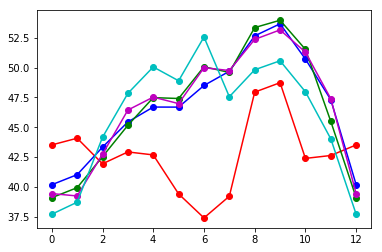

In [31]:
# py.contourf(range(13),lat_a,TE_a[0,...],cmap=cm.RdBu_r)
py.plot(storm_pos[0,:],'ro-')
py.plot(storm_pos[1,:],'bo-')
py.plot(storm_pos[2,:],'go-')
py.plot(storm_pos[3,:],'mo-')
py.plot(storm_pos[4,:],'co-')

In [32]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  D = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X= storm_pos
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X[d,m])
        except ValueError as err:
            D[d,m]==np.nan        
  return D

Intensity_te  = inerp_at_max(TE_a,lat_a)
Intensity_se  = inerp_at_max(SE_a,lat_a)
Intensity_mm  = inerp_at_max(MM_a,lat_a)
Intensity_ne  = inerp_at_max(NE_a,lat_a)
Intensity_ne1  = inerp_at_max(Ine_a,latr_a)

I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

P_SWAB =inerp_at_max(Fswabs_a,lat_a)
P_SHF  =inerp_at_max(Fshf_a,lat_a)
P_NE   =inerp_at_max(Fne_a,lat_a)
P_OLR  =inerp_at_max(Folr_a,lat_a)
P_dhdt =inerp_at_max(Fdhdt_a,lat_a)

P_SWsfc = inerp_at_max(FSW_sfc_a,lat_a)
P_LWsfc = inerp_at_max(FLW_sfc_a,lat_a)
P_SWtoa = inerp_at_max(FSW_toa_a,lat_a)
P_shflx = inerp_at_max(Fshflx_a,lat_a)
P_lhflx = inerp_at_max(Flhflx_a,lat_a)

P_SFC = inerp_at_max(FSFC_a,lat_a)
P_TOA = inerp_at_max(FTOA_a,lat_a)

In [57]:
### radiation
titles= ['0.1x friction','0.5x friction','ctrl', '2x friction', '10x friction' ]
titlesd= ['0.1x friction - cntrl','0.5x friction - cntrl','ctrl- cntrl', '2x friction- cntrl', '10x friction- cntrl' ]


def plot_intensity(d,l, diff=0):    
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def D(y,d):
            ctrl=y[2,:]
            if diff ==1 :
               y=y[:,:]-ctrl[None,:]
            y1=y[d,:]#-y[d,:-1,None].mean(axis=0)
            x2=y1
            mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
            return x2
                      
    py.plot(D(Intensity_te,d),'ro-',label=r'$\Delta I$',lw=3.5)
    py.plot(D(Intensity_ne,d),'mo-',label=r'$\Delta I_{NE}$',lw=3.5)   
    #py.plot(D(Intensity_ne1,d),'mo--',label=r'$\Delta I_{NE}$',lw=3.5)   
    py.plot(-D(Intensity_se,d),'bo-',label=r'$ - \Delta I_{SE}$',lw=3.5)
    py.plot(-D(Intensity_mm,d),'go-',label=r'$ - \Delta I_{MM}$',lw=3.5)
                                                         
    #py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=37)
    py.title(titles[d],fontsize=37,y=1.03)
    if diff ==1 :
        py.title(titlesd[d],fontsize=37,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)    
    py.tight_layout()

In [58]:
def compare_sfc_toa_dhdt(d,X,c,T,l=3, ylab=r'$Wm^{-2}$', ls='-', diff=0):    
    def D(y,d):
            ctrl=y[2,:]
            if diff ==1 :
               y=y[:,:]-ctrl[None,:]
            y1=y[d,:]#-y[d,:-1,None].mean(axis=0)
            x2=y1
            mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
            return x2
                      
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']            
    py.plot(range(13),D(X,d),'o'+ls ,color=c,label=T,lw=3.5)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel(ylab,fontsize=40)
    #py.legend(loc="best",fontsize=25,ncol=2,frameon=False)
    #py.axhline(0,color='k')
    py.ylim(-1*l,1*l)
    py.title(titles[d],fontsize=37,y=1.03)
    if diff ==1 :
        py.title(titlesd[d],fontsize=37,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.xlim(0,12)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)